In [213]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Arial Unicode MS"



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [214]:
# Uvoz knjižnice
import pandas as pd



# Branje CSV datoteke
knjige = pd.read_csv('knjige.csv', encoding='utf-8')

# Nastavimo, da se pri izpisu prikaže največ 20 vrstic
pd.options.display.max_rows = 20

# Pretvorba stolpcev v številčne vrednosti
knjige["ocena"] = pd.to_numeric(knjige["ocena"], errors="coerce").fillna(0)
knjige["stevilo_ocen"] = pd.to_numeric(knjige["stevilo_ocen"], errors="coerce").fillna(0).astype(int)
knjige["want_to_read"] = pd.to_numeric(knjige["want_to_read"], errors="coerce").fillna(0).astype(int)
knjige["prva_izdaja"] = pd.to_numeric(knjige["prva_izdaja"], errors="coerce").fillna(0).astype(int)
knjige["stevilo_izdaj"] = pd.to_numeric(knjige["stevilo_izdaj"], errors="coerce").fillna(0).astype(int)

# Izpišemo tabelo prvih 20 knjig, da vidimo, kako se nam izpišejo podatki
knjige.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
0,W.B. Yeats,William Butler Yeats,4.20,15,166,1895,135
1,A B C Murders,Agatha Christie,4.11,54,973,1936,132
2,The Annotated Charlotte's Web,E. B. White,4.03,399,0,1952,149
3,The Souls Of Black Folk: Essays And Sketches,W. E. B. Du Bois,4.00,8,225,1903,412
4,Finnegans wake: a facsimile of Buffalo noteboo...,James Joyce,3.58,12,117,1928,128
5,Art of poetry,"Aristotle,Leon Golden, andO. B. Hardison",3.86,7,251,1536,251
6,The B.F.G.,Roald Dahl,4.18,130,0,1980,136
7,The Elements of Style,"William Strunk, Jr.,E. B. White,William Strunk...",3.62,13,331,1920,273
8,"The Norton Anthology of English Literature, Vo...","M. H. Abrams,M. Abrams,M. H. Adams,Stephen Gre...",3.67,3,149,1962,244
9,Hunger,"Knut Hamsun,George Egerton,M. B. Ruud,Robert B...",3.75,12,78,1890,154


In [215]:

# Število vseh knjig
st_knjig = len(knjige)
print(st_knjig)


12000


In [216]:

# Knjige z vec kot 10 ocenami
# To nam bo pomagalo pri nadaljni analizi, kjer bomo želeli imeti le knjige
# z dovolj veliko ocenami, da bodo naše ugotovitve bolj točne.
# Prepričati se moramo da je takih knjig dolvolj. 
knjige_10 = knjige[knjige["stevilo_ocen"] > 10]
print(len(knjige_10))


1034


In [217]:

# Povprecna ocena
povprecna_ocena = knjige_10["ocena"].mean()
print(povprecna_ocena)


3.96390316615087


In [218]:

#Najvisja in najnizja ocena
najnizja = knjige_10.loc[knjige_10["ocena"].idxmin()]
najvisja = knjige_10.loc[knjige_10["ocena"].idxmax()]

print(najnizja)
print(najvisja)


naslov           Hannibal Rising
avtor              Thomas Harris
ocena                       2.76
stevilo_ocen                  17
want_to_read                  89
prva_izdaja                 2006
stevilo_izdaj                 22
Name: 1447, dtype: object
naslov           Empire of Storms (B&N Exclusive Edition) (Thro...
avtor                                                Sarah J. Maas
ocena                                                         4.94
stevilo_ocen                                                    16
want_to_read                                                   200
prva_izdaja                                                   2016
stevilo_izdaj                                                   24
Name: 1148, dtype: object


In [219]:

# Število vseh ocen
st_vseh_ocen = knjige["stevilo_ocen"].sum()
print(st_vseh_ocen)


61687


In [220]:

#Povprecen "want-to-read"
povprecen_want_to_read = knjige["want_to_read"].mean().round(2)
print(povprecen_want_to_read)


33.22


In [221]:

#Knjige z najvisjo oceno
knjige_razvrscene = knjige_10.sort_values(by="ocena", ascending=False)

knjige_razvrscene.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
570,Frog and Toad Are Friends,Arnold Lobel,4.92,12,218,1920,73
1814,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,2001,10
1028,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,1979,9
1823,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1717,The Pigeon Finds a Hot Dog!,Mo Willems,4.81,31,161,2004,13
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
1005,Prisoner B-3087,Alan Gratz,4.76,21,314,2013,2
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
2048,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,2009,8


In [222]:

# Top 10 want-to-read knjig
top10_wtr = knjige.sort_values("want_to_read", ascending=False)
top10_wtr.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1839,the sun and her flowers,Rupi Kaur,4.07,42,978,2017,9
961,Mistborn: the final empire,Brandon Sanderson,4.43,132,976,2001,41
665,Freakonomics: Un economista politicamente inco...,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",3.87,165,975,2005,63
1,A B C Murders,Agatha Christie,4.11,54,973,1936,132
310,Dr. Jekyll and Mr. Hyde,Robert Louis Stevenson,3.91,123,972,1875,359
265,The Count of Monte Cristo,Alexandre Dumas,4.31,176,966,1830,732
70,El juego de Ender,Orson Scott Card,4.35,382,960,1985,104
753,Because of Winn-Dixie,Kate DiCamillo,4.21,92,952,2000,55
852,Gone Girl,Gillian Flynn,3.64,55,934,2011,48
280,Adventures of Huckleberry Finn,Mark Twain,3.82,207,930,1876,2552


In [223]:

# Število knjig na avtorja
st_knjig_na_avtorja = knjige["avtor"].value_counts().head(10)
print(st_knjig_na_avtorja)


avtor
United States. Congress. House                 819
United States. Congress. House. Committe...    500
Unknown author                                 248
Betty Neels                                    110
Agatha Christie                                 99
United States. Congress. Senate. Committ...     62
Mildred Augustine Wirt Benson                   60
William Shakespeare                             52
Barbara Park                                    47
James Patterson                                 45
Name: count, dtype: int64


In [224]:

# Povprecna ocena na avtorja
povprecna_ocena_na_avtorja = knjige_10.groupby("avtor")["ocena"].mean().sort_values(ascending=False).head(10)
print(povprecna_ocena_na_avtorja)


avtor
Sarah J. Maas                                                4.94
Barbara ParkandDenise Brunkus                                4.82
Eddie Jaku                                                   4.81
Lucy FoleyandVictoria Horrillo Ledesma                       4.77
Alan Gratz                                                   4.76
Tahereh Mafi                                                 4.73
Elisabetta Dami,Danilo Barozzi,Julia Heim, andDavid Nel·lo   4.73
Romney Marshall, B., and Paul Jhon Stein...                  4.67
刘慈欣andJoel Martinsen                                         4.65
Julie GarwoodandSusan Duerden                                4.64
Name: ocena, dtype: float64


In [225]:

# Najbolje ocenjene knjige v zadnjih 10-ih letih
novejse_knjige = knjige_10[knjige_10["prva_izdaja"] >= 2015].sort_values("ocena", ascending=False)
novejse_knjige.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
1823,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
2065,Arcanum Unbounded: The Cosmere Collection: the...,Brandon Sanderson,4.69,16,58,2016,13
937,Getaway (Diary of a Wimpy Kid Book 12) (Exclus...,Jeff Kinney,4.66,59,819,2017,39
1601,Oathbringer: The Stormlight Archive Book Three,Brandon Sanderson,4.57,83,198,2017,16
1420,Shoe Dog: A Memoir by the Creator of Nike,Phil Knight,4.53,45,661,2016,23
1528,The Hollow Boy,Jonathan Stroud,4.50,12,123,2015,19
3480,The Raven Tower,Ann Leckie,4.47,15,37,2019,8


In [226]:

# Najstarejše knjige
# Ponovno uporabimo knjige, za katere imamo podano leto izdaje
knjige_veljavne1 = knjige[knjige["prva_izdaja"] > 0].copy()
knjige_po_letih = knjige_veljavne1.sort_values("prva_izdaja")
knjige_po_letih.head(10)[["naslov", "avtor", "prva_izdaja", "ocena"]]


,naslov,avtor,prva_izdaja,ocena
191,The Holy Bible: containing the Old and New Tes...,Bible,1200,3.93
5346,The new psalter of the Roman breviary: text an...,Catholic Church,1200,0.00
694,"De civitate dei, libri XXII",Augustine of Hippo,1440,3.50
1512,Tully's offices: in three books,Cicero,1465,0.00
138,C. Plini Secundi naturalis historiae libri XXX...,Pliny the Elder,1469,4.33
1836,De vita Caesarum: libri VIII,SuetoniusandR. E. J. Fitzpatrick,1470,0.00
2264,Justin's history of the world from the Assyria...,"Marcus Junianus Justinus,Justin, andWaldemar H...",1470,3.50
5298,The pastoral care: King Alfred's translation o...,"Pope Gregory I,Bruno Judic, andFloribert Rommel",1470,3.00
594,Mishneh Torah leha-Rambam: hilkhot ʻavadim,Moses Maimonides,1470,4.00
3648,De finibus bonorum et malorum,Cicero,1471,4.00


In [227]:

# Število knjig po številu izdaj
knjige_izdaje = knjige[knjige["stevilo_izdaj"] > 0] # izpustimo knjige, ki nimajo podatka o številu izdaj
st_knjig_po_st_izdaj = knjige_izdaje["stevilo_izdaj"].value_counts().sort_index().astype(int)
print(st_knjig_po_st_izdaj)

stevilo_izdaj
2       843
3       445
4       286
5       208
6       178
       ... 
2986      1
3172      1
3456      1
3546      1
4036      1
Name: count, Length: 495, dtype: int64


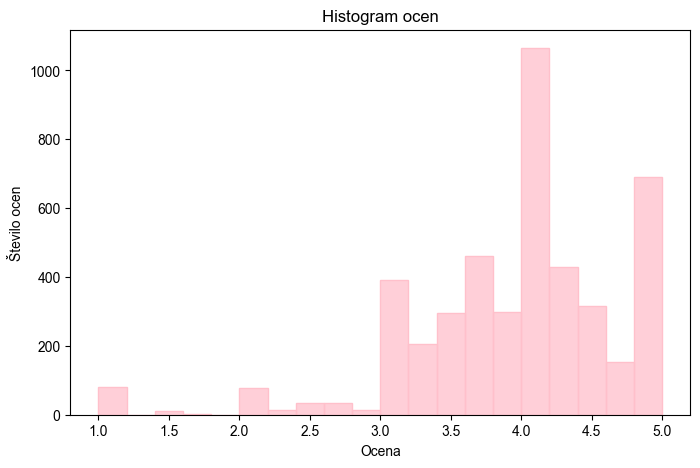

In [228]:

# Histogram ocen
ocena_poz = knjige["ocena"][knjige["ocena"] > 0] #znebimo se knjig brez podatkov o oceni

plt.figure(figsize=(8,5))
sns.histplot(ocena_poz, bins = 20, color="pink", edgecolor = "pink")
plt.title("Histogram ocen")
plt.xlabel("Ocena")
plt.ylabel("Število ocen")
plt.show()

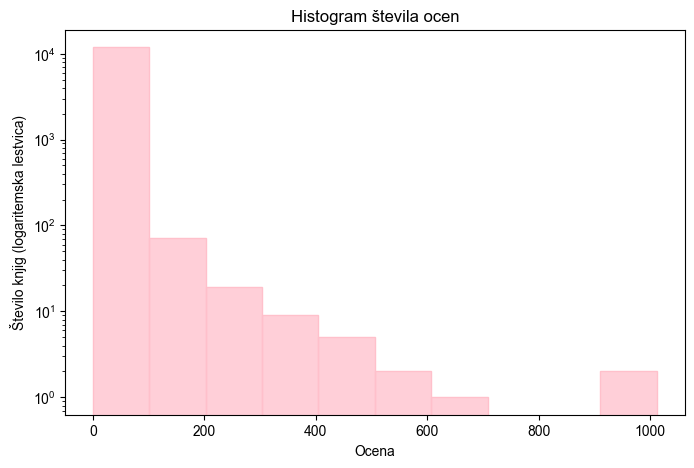

In [229]:
# Histogram števila ocen
plt.figure(figsize=(8,5))
sns.histplot(knjige["stevilo_ocen"].dropna(), bins=10, color="pink", edgecolor="pink")
plt.title("Histogram števila ocen")
plt.xlabel("Ocena")


# Pri prikazu histograma ocen, smo os y nastavlili na logritmično lestvico.
# To naredimo zato, ker je porazdelitev števila ocen dokaj nesimetrična, 
# veliko knjig ima zelo malo ocen, medtem ko ima nekaj knjig kar veliko ocen.
# Z logaritmično lestvico se majhne in velike vrednosti bolje prikažejo skupaj,
# saj logaritmiranje kompresira visoke vrednosti in razširi nizke vrednosti. 
plt.yscale("log")
plt.ylabel("Število knjig (logaritemska lestvica)")

plt.show()

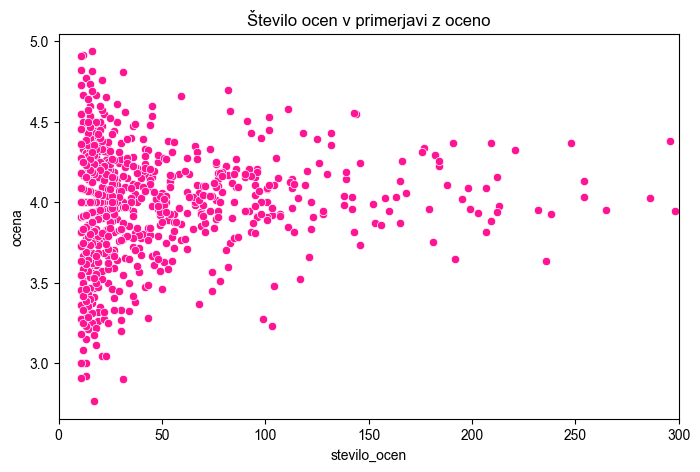

In [230]:
# Raztresen diagram: število ocen v primerjavi s povprečno oceno
plt.figure(figsize=(8,5))
sns.scatterplot(x = "stevilo_ocen", y = "ocena", data = knjige_10, color = "deeppink")
plt.title("Število ocen v primerjavi z oceno")
plt.xlim(0, 300)
plt.show()

# Opazka: iz grafa lahko opazimo, da imajo knjige z malo ocen širši razpon ocen,
# ko se število ocen povečuje, pa se interval ocen postopoma zožuje, kar pomeni,
# da se povprečne ocene ujemajo bolj dosledno in razpršenost ocen se manjša.

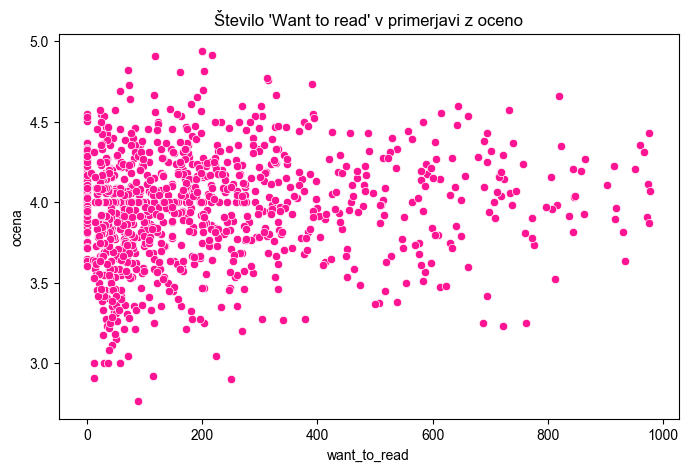

In [231]:
# Raztresen diagram: Število "Want to read" v primerjavi z oceno
plt.figure(figsize=(8,5))
sns.scatterplot(
    x = "want_to_read", 
    y = "ocena",
    data = knjige_10,
    color = "deeppink")
plt.title("Število 'Want to read' v primerjavi z oceno")
plt.show()

# Opazka: opazimo, da se zgodi podobno kot pri prejšnjem grafu, kar se tiče razpršitve, vendar hkrati lahko opazimo, 
# da imajo dokaj visok "want to read" tudi knjige, ki nimajo tako visoke ocene.

In [232]:
# Najbolj ocenjene knjige
najbolj_ocenjene = knjige.sort_values("stevilo_ocen", ascending = False)
najbolj_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
755,De 48 wetten van de macht,Robert Greene,4.04,1012,0,1998,55
59,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.01,978,0,1990,115
465,A Game of Thrones,George R. R. Martin,4.22,698,0,1996,87
250,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.28,581,0,1999,261
266,Animal Farm,George Orwell,4.13,510,0,1945,413
312,Think and Grow Rich,Napoleon HillandJonathan C. Young,4.01,499,0,1937,287
118,The Hunger Games,Suzanne Collins,4.10,459,0,2008,131
236,The Hobbit,J.R.R. Tolkien,4.28,459,0,1937,460
369,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.20,435,0,1998,275
382,Brave New World,Aldous Huxley,3.96,427,0,1932,678


In [233]:
# Najbolje ocenjene knjige z več kot 10 ocenami
# Prej smo si ogledali najbolje ocenjene knjige v zadnjih 10-ih letih, sedaj pa si bomo ogledali
# najbolje ocenjene knjige vseh časov.
 
najbolje_ocenjene = knjige_10.sort_values("ocena", ascending=False)
najbolje_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,2016,24
570,Frog and Toad Are Friends,Arnold Lobel,4.92,12,218,1920,73
1814,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,2001,10
1028,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,1979,9
1823,The Happiest Man on Earth,Eddie Jaku,4.81,16,204,2020,10
1717,The Pigeon Finds a Hot Dog!,Mo Willems,4.81,31,161,2004,13
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13,312,2020,17
1005,Prisoner B-3087,Alan Gratz,4.76,21,314,2013,2
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15,391,2019,6
2048,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,2009,8


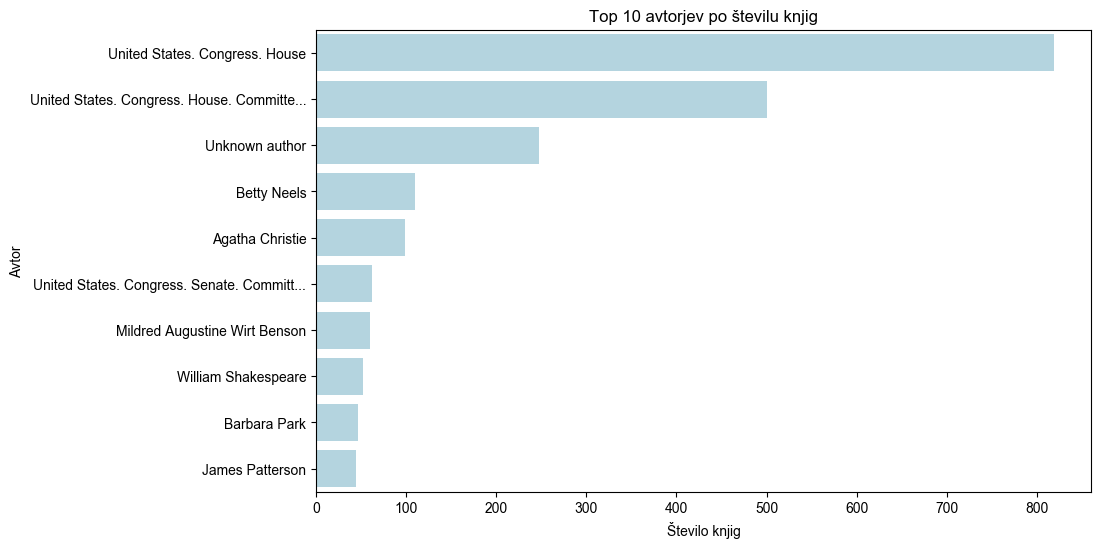

In [234]:
# Najbolj izdajani avtorji

top10_avtorjev = st_knjig_na_avtorja.head(10) # izberemo 10 avtorjev z največjim številom knjig

# Narišemo graf
plt.figure(figsize=(10,6))
sns.barplot(
    x = top10_avtorjev.values,
    y = top10_avtorjev.index,
    color = "lightblue"
)
plt.title("Top 10 avtorjev po številu knjig")
plt.xlabel("Število knjig")
plt.ylabel("Avtor")
plt.show()

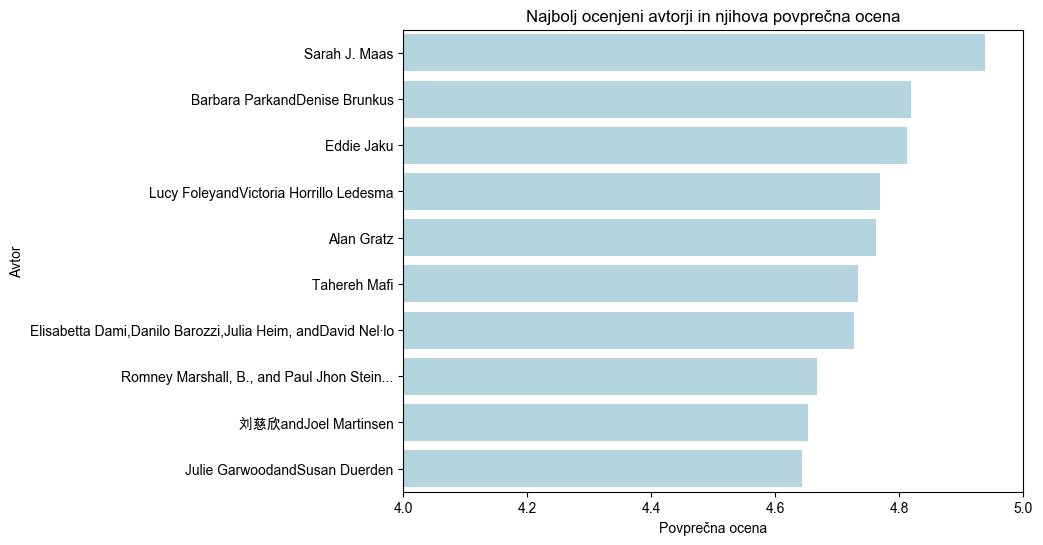

['Arial Unicode MS']

In [235]:
# Najbolje ocenjeni avtorji
top10_ocenjeni = povprecna_ocena_na_avtorja.head(10) # Vzamemo 10 avtorjev, z najvišjo povprečno oceno vseh knjig, ki jih je izdal/a

# Vrstični diagram
plt.figure(figsize=(8, 6))
sns.barplot(
    x = top10_ocenjeni.values,
    y = top10_ocenjeni.index,
    color="lightblue"
)
plt.title("Najbolj ocenjeni avtorji in njihova povprečna ocena")
plt.xlabel("Povprečna ocena")
plt.xlim(4, 5)
plt.ylabel("Avtor")
plt.show()

plt.rcParams['font.family'] # Nastavimo font, ki podpira CJK znake 

In [236]:
# Top 10 avtorjev na podlagi števila "Want to read"

avtorji_wtr = (
    knjige.groupby("avtor")["want_to_read"]
    .sum() #sešteje "want_to_read" vseh knjig avtorja
    .sort_values(ascending=False)
    )

top10_avtorji_wtr = avtorji_wtr.head(10)
top10_avtorji_wtr

avtor
Agatha Christie          11653
William Shakespeare       5958
Stephen King              5820
James Patterson           4156
Anne Rice                 3889
Brandon Sanderson         3800
Betty Neels               3800
Arthur Conan Doyle        3235
Charles Dickens           3020
Robert Lawrence Stine     2610
Name: want_to_read, dtype: int64

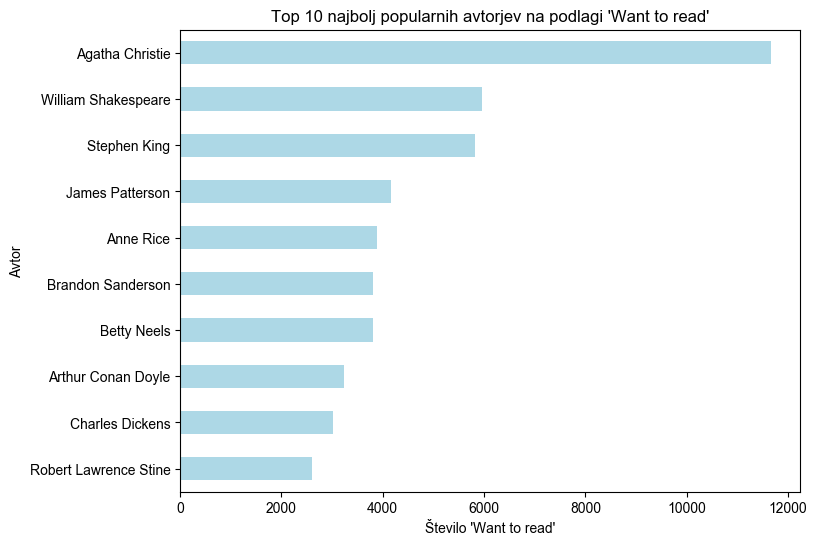

In [237]:
# Vrstični diagram najbolj popularnih avtorjev (na podlagi "want to read")

top10_avtorji_wtr.plot(kind = "barh", figsize=(8, 6), color = "lightblue") 
plt.title("Top 10 najbolj popularnih avtorjev na podlagi 'Want to read'") 
plt.xlabel("Število 'Want to read'") 
plt.ylabel("Avtor") 
plt.gca().invert_yaxis() # Nastavi najbolj popularne avtorje na vrh
plt.show()

In [238]:

# Število prvih izdaj na stoletje
# vzamemo le knjige, za katere imamo podatke o letu prve izaje
knjige_veljavne1["stoletje"] = (((knjige_veljavne1["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako (npr. "20. stoletje")
knjige_veljavne1["stoletje_oznaka"] = knjige_veljavne1["stoletje"].astype(str) + ". stoletje:"
knjige_na_stoletje = knjige_veljavne1["stoletje_oznaka"].value_counts().sort_index()

print(knjige_na_stoletje)

stoletje_oznaka
12. stoletje:       2
15. stoletje:      56
16. stoletje:     117
17. stoletje:     159
18. stoletje:     411
19. stoletje:    1589
20. stoletje:    5797
21. stoletje:    3699
Name: count, dtype: int64


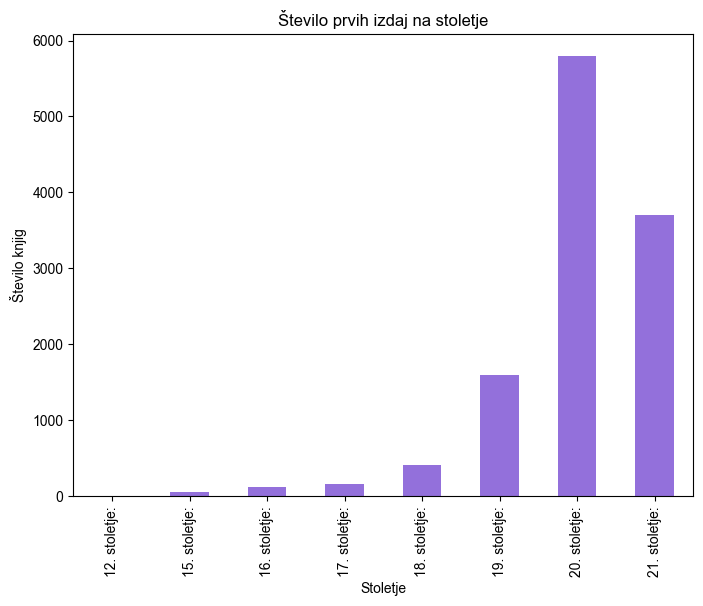

In [239]:
# Stolpični diagram prvih izdaj vsako stoletje
plt.figure(figsize=(8,6))
knjige_na_stoletje.plot(kind="bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Število prvih izdaj na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Število knjig")
plt.show()

In [240]:
# Število prvih izdaj vsako desetletje (v zadnjih 100 letih)
trenutno_leto = pd.Timestamp.now().year

novejse_knjige1 = knjige[(knjige["prva_izdaja"] > trenutno_leto - 100) & (knjige["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = ((novejse_knjige1["prva_izdaja"] // 10) * 10).astype(int)

knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()
knjige_na_desetletje

desetletje
1920     144
1930     357
1940     265
1950     388
1960     550
1970     652
1980     910
1990    1256
2000    1566
2010    1727
2020     598
Name: count, dtype: int64

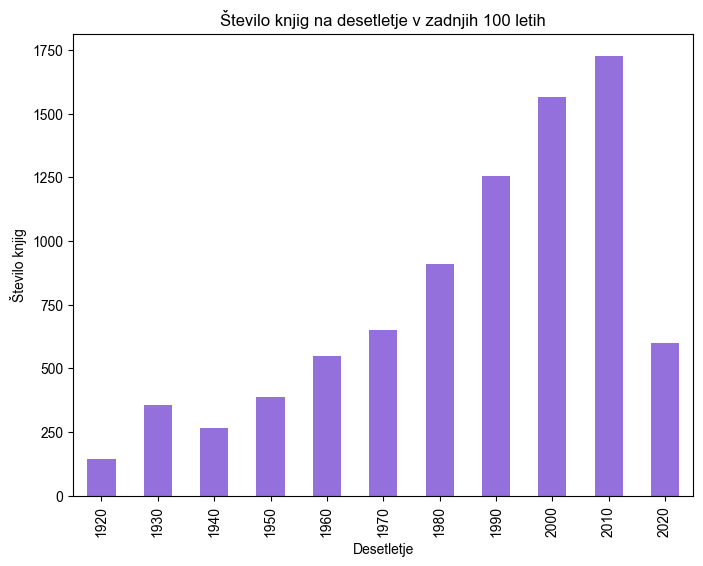

In [241]:
# Stolpični diagram prvih izdaj vsako desetletje (v zadnjem stoletju)
knjige_na_desetletje.plot(kind="bar", figsize=(8, 6), color = "mediumpurple")
plt.title("Število knjig na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Število knjig")
plt.show()

In [242]:

# Povprečna ocena na stoletje

# Ponovno uporabimo le knjige, za katere imamo podatek o letu izdaje, le da sedaj
# hkrati upoštevamo, da morajo imeti knjige več kot 10 ocen, zato namesto "knjige",
# uporabimo "knjige_10", kar smo definirali že na začetku.
knjige_veljavne2 = knjige_10[knjige_10["prva_izdaja"] > 0].copy() 
knjige_veljavne2["stoletje"] = (((knjige_veljavne2["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako kot prej
knjige_veljavne2["stoletje_oznaka"] = knjige_veljavne2["stoletje"].astype(str) + ". stoletje:"

povprecna_ocena_na_stoletje = (
    knjige_veljavne2
    .groupby(["stoletje", "stoletje_oznaka"])["ocena"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("stoletje")
    .loc[:, ["stoletje_oznaka", "ocena"]] # znebimo se oznake "stoletje", ki smo jo potrebovali za pravilen vrstni red
    .rename(columns={"stoletje_oznaka": "stoletje", "ocena" : "povprecna_ocena"})
)

print(povprecna_ocena_na_stoletje)


        stoletje  povprecna_ocena
0  12. stoletje:             3.93
1  15. stoletje:             3.91
2  16. stoletje:             3.76
3  17. stoletje:             3.76
4  18. stoletje:             3.81
5  19. stoletje:             3.90
6  20. stoletje:             3.96
7  21. stoletje:             4.04


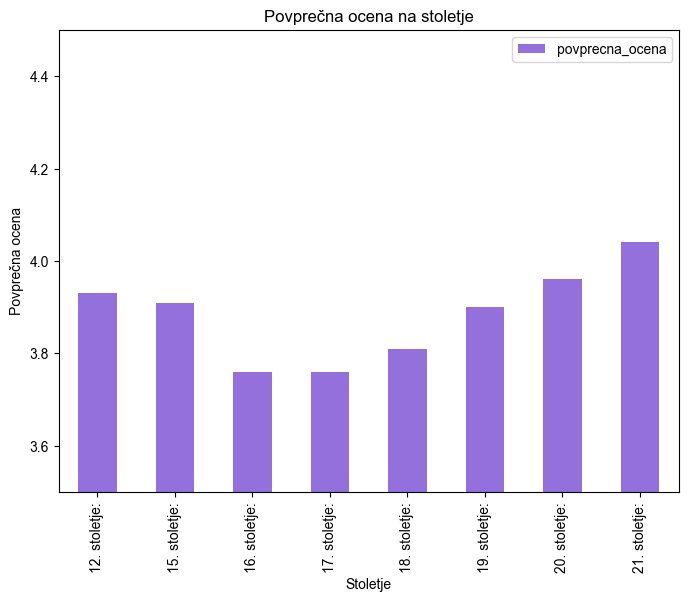

In [243]:
# Stolpični diagram povprečne ocene na stoletje (knjig z več kot 10 ocenami)

povprecna_ocena_na_stoletje.plot(
    x = "stoletje",
    y = "povprecna_ocena",
    kind = "bar",
    figsize=(8, 6), 
    color = "mediumpurple")
plt.title("Povprečna ocena na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Povprečna ocena")
plt.ylim(3.5, 4.5) # omejiti se moramo na dokaj majhen interval, saj so razlike dokaj minimalne
plt.show()

In [244]:
# Povprečna ocena na desetletje (v zadnjih 100 letih, knjig z več kot 10 ocenami)
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()
novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = ((novejse_knjige1["prva_izdaja"] // 10) * 10).astype(int) # desetletje napiše kot celo število
knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()

povp_desetletje = novejse_knjige1.groupby("desetletje")["ocena"].mean()
povp_desetletje

desetletje
1920   4.06
1930   4.07
1940   4.04
1950   3.91
1960   4.00
1970   4.01
1980   3.93
1990   3.94
2000   4.02
2010   4.05
2020   4.17
Name: ocena, dtype: float64

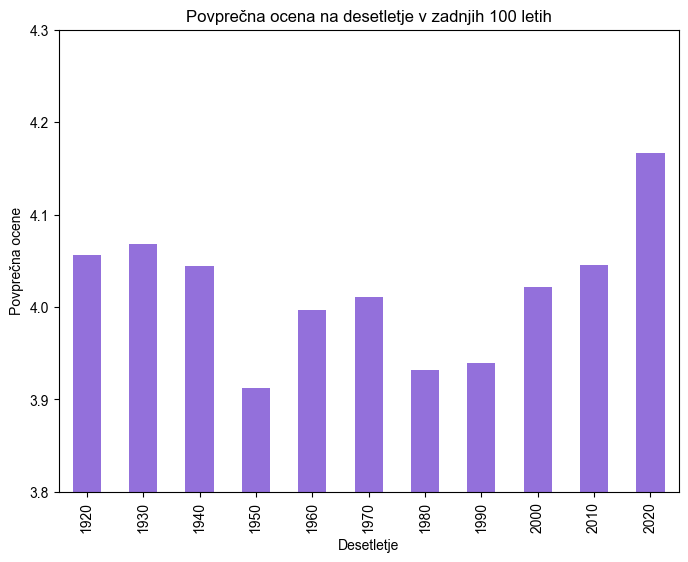

In [245]:
# Stolpični diagram povprečnih ocen na desetletje (v zadnjih 100 letih)
povp_desetletje.plot(kind = "bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Povprečna ocene")
plt.ylim(3.8, 4.3)
plt.show()

In [246]:
# Povprečne ocene knjig v zadnjih 100 letih
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()

novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1_povp = novejse_knjige1.groupby("prva_izdaja")["ocena"].mean().sort_index()
novejse_knjige1_povp

prva_izdaja
1926   4.09
1927   4.08
1928   3.96
1929   4.15
1930   4.05
       ... 
2018   4.00
2019   4.05
2020   4.19
2021   4.08
2022   4.35
Name: ocena, Length: 95, dtype: float64

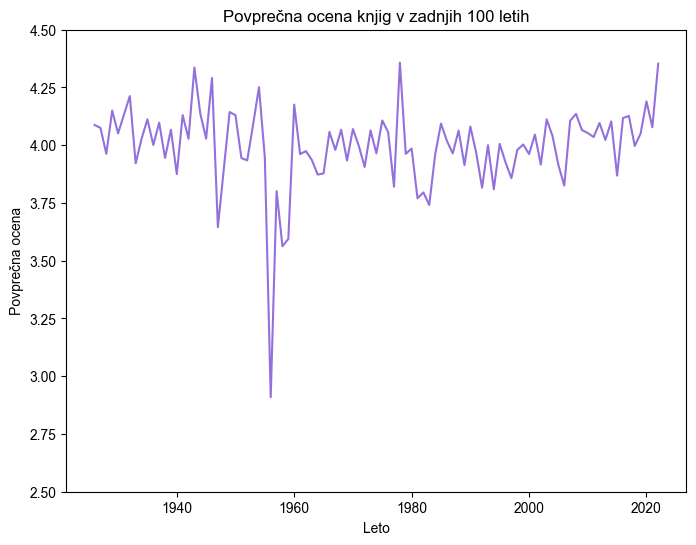

In [247]:
# Graf povprečnih ocen knjig v zadnjih 100 letih (knjig z več kot 10 ocenami)
novejse_knjige1_povp.plot(kind = "line", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena knjig v zadnjih 100 letih")
plt.xlabel("Leto")
plt.ylabel("Povprečna ocena")
plt.ylim(2.5, 4.5)
plt.show()

# Opazimo, da se povprečna ocena knjig vsako leto nahaj nekje med 3.5 in 4.5, razen med letoma 1950 in 1960.

In [248]:
# Knjige z največjim številom izdaj
knjige_izdaje = knjige.sort_values("stevilo_izdaj", ascending = False)
knjige_izdaje.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
279,Pride and Prejudice,Jane Austen,4.16,322,0,1813,4036
170,Alice's Adventures in Wonderland,Lewis Carroll,4.02,195,0,1865,3546
376,Current law statutes annotated.,Great Britain.,3.27,11,196,1691,3456
191,The Holy Bible: containing the Old and New Tes...,Bible,3.93,69,0,1200,3172
348,The Picture of Dorian Gray,Oscar Wilde,4.11,104,0,1890,2986
203,Wuthering Heights,Emily Brontë,3.95,232,0,1846,2850
456,Coloring Book: Dachshund Dog B 69 Pages - 8 X ...,Donald Nguyen,5.00,1,80,2019,2735
252,A Christmas Carol,Charles Dickens,3.95,92,584,1843,2727
280,Adventures of Huckleberry Finn,Mark Twain,3.82,207,930,1876,2552
99,Emma,Jane Austen,3.98,50,815,1815,2261


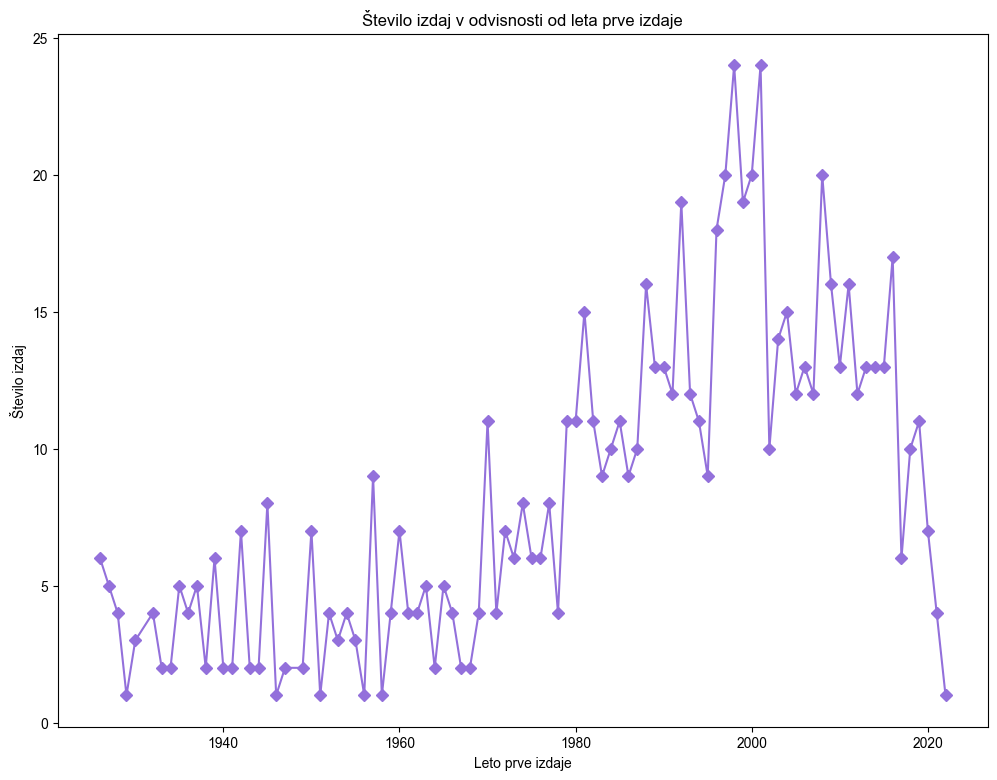

In [249]:
# Število izdaj v odvisnosti od leta izdaje
izdaje_na_leto = novejse_knjige1.groupby("prva_izdaja").size()

plt.figure(figsize=(12, 9))
izdaje_na_leto.plot(kind="line", marker = "D", color = "mediumpurple")
plt.title("Število izdaj v odvisnosti od leta prve izdaje")
plt.xlabel("Leto prve izdaje")
plt.ylabel("Število izdaj")
plt.show()

# Opazimo, da imajo največ izdaj dokaj novejše knjige, torej knjige napisane 
# okoli leta 2000

In [250]:
# Število ocen v odvisnosti od "Want to read"

# Pearsonov korelacijski koeficient med številom ocen in "want to read" nam pove,
# kako močno linearno sta ti dve spremenljivki povezani. 
# Pozitivna vrednost pomeni, da knjige z več ocenami običajno želijo prebrati več uporabnikov."
povezava_st_ocen_wtr = knjige["stevilo_ocen"].corr(knjige["want_to_read"])

print("Povezava:", povezava_st_ocen_wtr)

# Knjige z več ocenami imajo tudi večji "want to read", ampak povezava ni zelo mocna,
# torej izjeme vseeno obstajajo.

Povezava: 0.3200370657839728


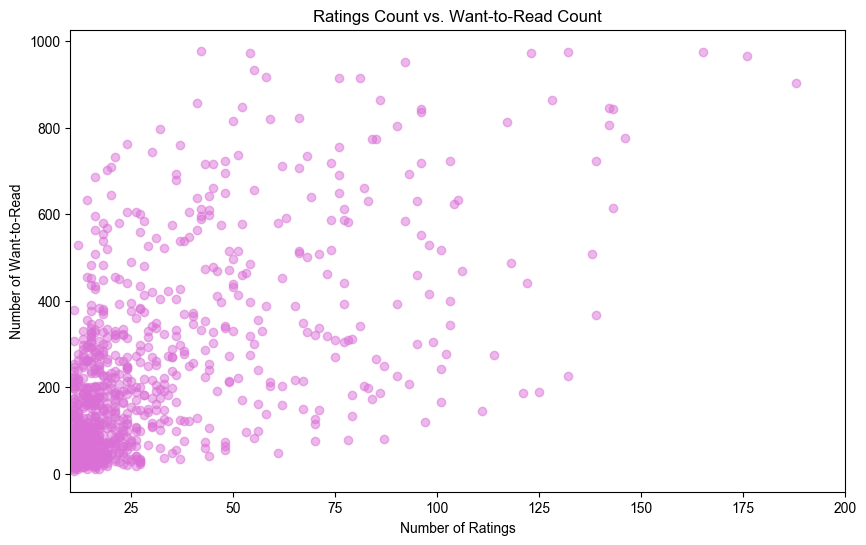

In [251]:

plt.figure(figsize=(10,6))
knjige_veljavne3 = knjige_10[knjige_10["want_to_read"] > 0] # vzamemo knjige z dovolj veliko ocenami, ki imajo podatke o "want to read"
plt.scatter(knjige_veljavne3["stevilo_ocen"], knjige_veljavne3["want_to_read"], alpha=0.5, color = "orchid")

plt.title("Ratings Count vs. Want-to-Read Count")
plt.xlabel("Number of Ratings")
plt.xlim(10, 200)
plt.ylabel("Number of Want-to-Read")
plt.show()

# Tudi iz grafa lahko opazimo, da med tema dvema vrednostima ni zelo močne povezave, saj 
# obstajajo knjige, ki imajo dokaj malo ocen, ki jih kljub temu želi prebrati veliko ljudi.


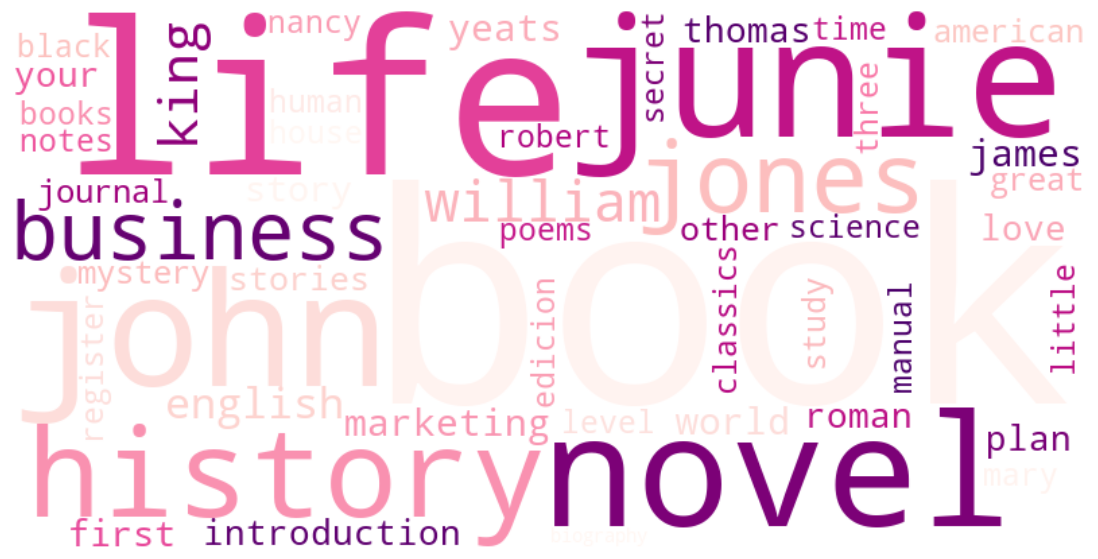

In [252]:
# Najpogostejše besede v naslovih knjig
from collections import Counter
import re
from wordcloud import WordCloud

# Odstranimo besede, kot so vezniki, predlogi in besede, ki se pogosto pojavijo v naslovih knjig, a ne nosijo 
# vsebinske informacije o knjigi same.

stop_besede = {"the", "and", "of", "in", "a", "an", "for", "to", "on", "with", "b2b",
                "volume", "part", "series", "edition", "laminated", "guide", "from"}
vse_besede = []

for naslov in knjige["naslov"]:
    besede = re.findall(r"\b[a-zčšž]+\b", str(naslov).lower())
    besede = [beseda for beseda in besede if beseda not in stop_besede and len(beseda) > 3] 
    # Predloge in veznike, ki jih prej nismo odstranili,
    # odstranimo sedaj, ko dodamo pogoj, da mora biti dolžina besede več kot 3. 
    vse_besede.extend(besede)

pojavitev_besed = Counter(vse_besede)
najbolj_pogoste_besede_v_naslovu = pojavitev_besed.most_common(20)

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color= "white",
    colormap = "RdPu",
    max_words = 50
).generate_from_frequencies(pojavitev_besed)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

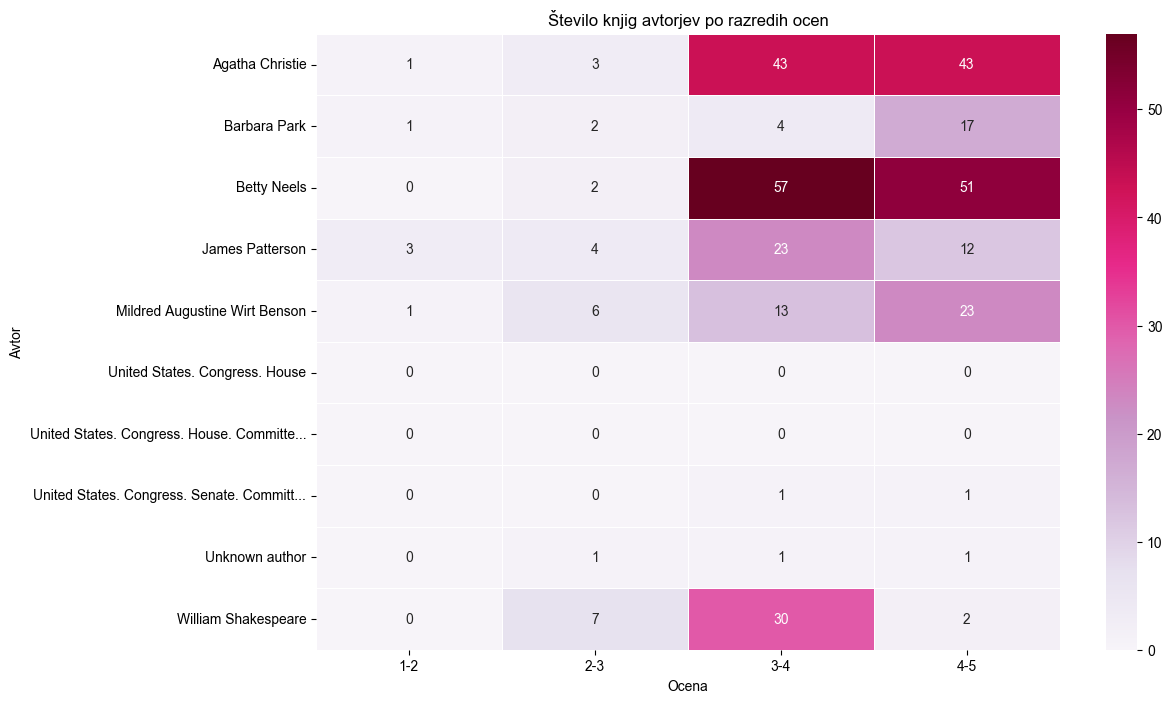

In [253]:
# Število knjig avtorjev v odvisnosti od povprečne ocene avtorjev
ocene = [1, 2, 3, 4, 5] # meje za razrede ocen
oznake = ["1-2", "2-3", "3-4", "4-5"] # imena razredov, ki bodo prikazana na grafu

top10_avtorjev = st_knjig_na_avtorja.head(10).index

knjige_top10 = knjige[knjige["avtor"].isin(top10_avtorjev)].copy() # Vzamemo knjige top 10 avtorjev

# Ocene knjig razporedimo v razrede
knjige_top10["razredi_ocen"] = pd.cut(
    knjige_top10["ocena"],
    bins = ocene,
    labels = oznake,
    include_lowest = True)

# Naredimo tabelo, ki prikaže število knjig vsakega avtorja v posameznem razredu ocen
ocene_knjig_avtorjev_count = knjige_top10.pivot_table(
    index = "avtor",
    columns="razredi_ocen",
    values ="naslov",
    aggfunc = "count",
    fill_value = 0,
    observed=False
)

plt.figure(figsize=(12,8))
sns.heatmap(ocene_knjig_avtorjev_count, cmap="PuRd", linewidths=0.5, annot=True, fmt="d")
plt.title("Število knjig avtorjev po razredih ocen")
plt.xlabel("Ocena")
plt.ylabel("Avtor")
plt.show()


In [254]:
# Top 10 najbolj overrated knjig

# Vzamemo samo knjige, ki imajo podatke o številu "want to read"
knjige_nonzero_wtr = knjige_10[knjige_10["want_to_read"] > 0].copy()

# Shranimo povprečno oceno vseh knjig, ki jo bomo uporabljali za referenco pri določanju precenjenosti
povprecje_vseh = knjige_nonzero_wtr["ocena"].mean()

# Metrika za določanje knjig, ki so precenjene

# V izračunu so le knjige z dovolj visoko oceno, oziroma knjige z nizko oceno so ustrezno "kaznovane"
# Ustvarimo parametra, ki ju lahko uporabimo kot "teži" pri določanju, katere knjige so precenjene
m = knjige_nonzero_wtr["stevilo_ocen"].quantile(0.75)  # meja za število ocen, ki jo ima zgornjih 75% knjig
p = povprecje_vseh

knjige_nonzero_wtr["prilagojena_ocena"] = (knjige_nonzero_wtr["ocena"] - knjige_nonzero_wtr["ocena"].min()) / \
                                          (knjige_nonzero_wtr["ocena"].max() - knjige_nonzero_wtr["ocena"].min())

knjige_nonzero_wtr["prilagojen_wtr"] = (knjige_nonzero_wtr["want_to_read"] - knjige_nonzero_wtr["want_to_read"].min()) / \
                                       (knjige_nonzero_wtr["want_to_read"].max() - knjige_nonzero_wtr["want_to_read"].min())


# Izračun metrike precenjenosti
# Metrika meri razliko med željo po branju in dejansko oceno
knjige_nonzero_wtr["mera_precenjenosti"] = knjige_nonzero_wtr["prilagojen_wtr"] - knjige_nonzero_wtr["prilagojena_ocena"]

# Top 10 najbolj precenjenih
top_over = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=False).head(10)

# Potrebni podatki za prikaz tabel
podatki_over = top_over[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_over["ocena"] = podatki_over["ocena"].round(2)
podatki_over["mera_precenjenosti"] = podatki_over["mera_precenjenosti"].round(2)

# Top 10 najbolj podcenjenih
top_under = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=True).head(10)

# Potrebni podatki za prikaz tabel
podatki_under = top_under[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_under["ocena"] = podatki_under["ocena"].round(2)
podatki_under["mera_precenjenosti"] = podatki_under["mera_precenjenosti"].round(2)

In [255]:
# Tabela top 10 precenjenih knjig
podatki_over

,naslov,avtor,ocena,stevilo_ocen,want_to_read,mera_precenjenosti
1862,Culpa nuestra,Mercedes Ron,3.25,24,762,0.55
852,Gone Girl,Gillian Flynn,3.64,55,934,0.55
248,The Scarlet Letter,Nathaniel Hawthorne,3.23,103,722,0.52
665,Freakonomics: Un economista politicamente inco...,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",3.87,165,975,0.49
283,Heart of darkness,Joseph Conrad,3.52,117,813,0.48
1200,The Artist's Way,Julia CameronandAda Arbós Bo,3.25,16,687,0.48
280,Adventures of Huckleberry Finn,Mark Twain,3.82,207,930,0.47
310,Dr. Jekyll and Mr. Hyde,Robert Louis Stevenson,3.91,123,972,0.47
102,Secret Garden. Livello B1. 1. Con CD-ROM,Frances Hodgson Burnett,3.89,76,916,0.42
485,Cinquante nuances plus sombres: roman,E. L. James,3.42,36,694,0.41


In [256]:
# Tabela top 10 podcenjenih knjig
podatki_under

,naslov,avtor,ocena,stevilo_ocen,want_to_read,mera_precenjenosti
1028,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11,71,-0.88
1814,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11,119,-0.87
2048,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11,73,-0.84
2065,Arcanum Unbounded: The Cosmere Collection: the...,Brandon Sanderson,4.69,16,58,-0.83
4784,Dios Tullido. Malaz X,Steven Erikson,4.57,14,23,-0.82
3096,Ring in a Teacup,Betty Neels,4.55,11,24,-0.80
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16,200,-0.80
1706,Secreto / The Secret,Julie GarwoodandSusan Duerden,4.64,14,75,-0.79
4057,Doblan Por los Mastines,Steven Erikson,4.53,15,29,-0.79
2406,No longer a dream,Carole Mortimer,4.57,14,49,-0.79


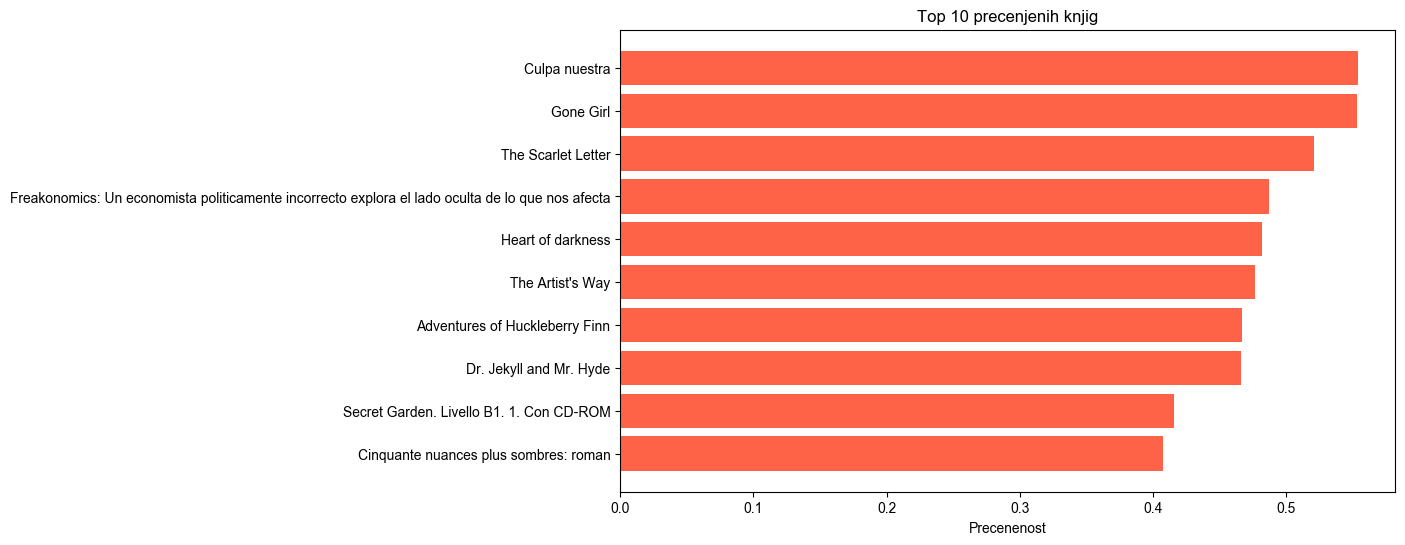

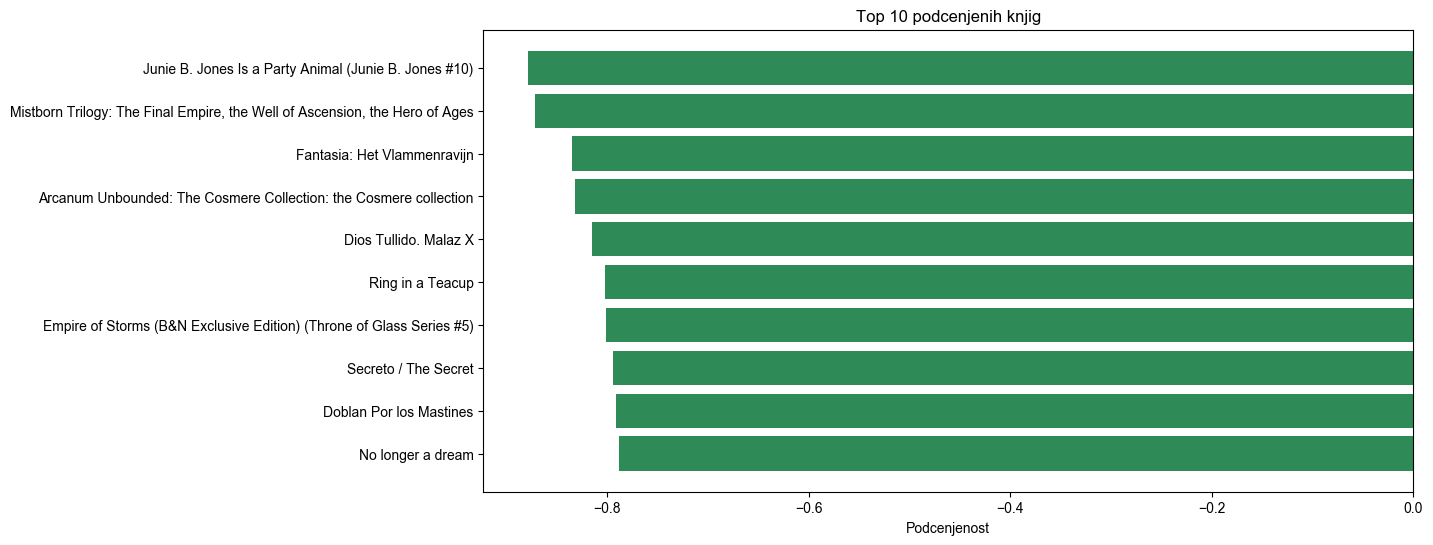

In [257]:
# Vrstični diagram najbolj precenjenih knjig po meri precenjenosti
plt.figure(figsize=(10,6))
plt.barh(top_over["naslov"], top_over["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih knjig")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

# Vrstični diagram najbolj podcenjenih knjig po meri precenjenosti
plt.figure(figsize=(12,6))
plt.barh(top_under["naslov"], top_under["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()

In [258]:
# Top 10 knjig najbolj vrednih branja
# Knjige, ki imajo dovolj visoko oceno in hkrati dovolj veliko ocen, da so ocene "accurate"

import numpy as np

# Za vsako knjigo izračunamo metriko "vredne_branja"
# Vzamemo logaritemsko funkcijo log(1 + n), ki preprečuje, da bi knjige z ogromnim številom ocen vedno prevladale
# To pomnožimo z oceno knjige, kar poskrbi, da so visoko ocenjene knjige "prednostno uvrščene".
knjige_10["vredne_branja"] = knjige["ocena"] * np.log1p(knjige["stevilo_ocen"])
top10_vrednih_branja = knjige_10.sort_values("vredne_branja", ascending = False).head(10)

# Prikaz v tabeli
podatki_vredne = top10_vrednih_branja[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "vredne_branja"]].copy()
podatki_vredne["ocena"] = podatki_vredne["ocena"].round(2)
podatki_vredne["vredne_branja"] = podatki_vredne["vredne_branja"].round(2)

podatki_vredne


,naslov,avtor,ocena,stevilo_ocen,want_to_read,vredne_branja
755,De 48 wetten van de macht,Robert Greene,4.04,1012,0,27.97
465,A Game of Thrones,George R. R. Martin,4.22,698,0,27.62
59,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.01,978,0,27.62
250,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.28,581,0,27.22
236,The Hobbit,J.R.R. Tolkien,4.28,459,0,26.25
70,El juego de Ender,Orson Scott Card,4.35,382,960,25.89
266,Animal Farm,George Orwell,4.13,510,0,25.76
369,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.20,435,0,25.55
331,Harry Potter und die Heiligtümer des Todes,J. K. Rowling,4.28,389,0,25.51
118,The Hunger Games,Suzanne Collins,4.10,459,0,25.15


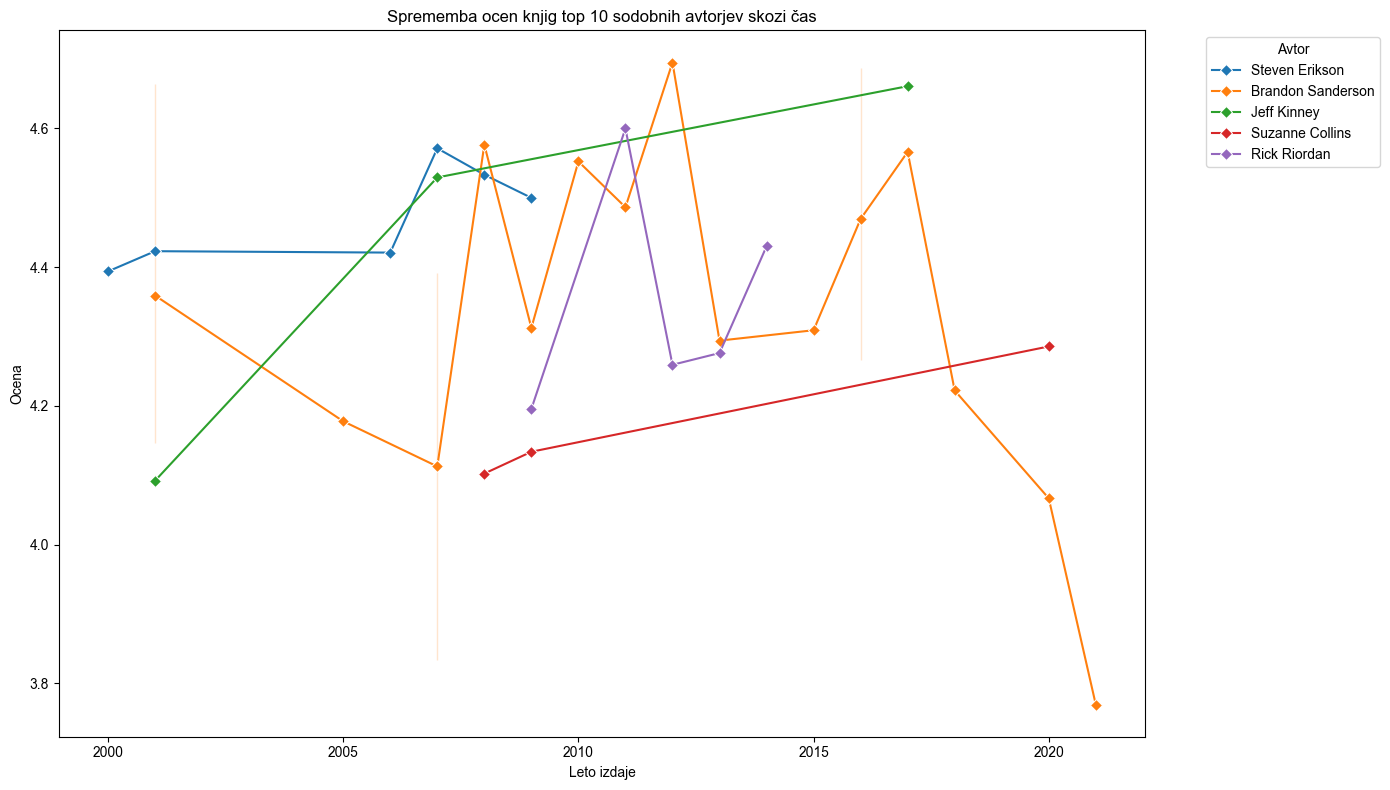

In [259]:
# Distribucija ocen knjig top 10 najbolje ocenjenih avtorjev v zadnjem stoletju
knjige_novejse = knjige_10[knjige_10["prva_izdaja"] >= 2000].copy()

# Izberemo avtorje z vsaj tremi knjigami
st_knjig_avtorja = knjige_novejse["avtor"].value_counts()
veljavni_avtorji = st_knjig_avtorja[st_knjig_avtorja >= 3].index
knjige_novejse = knjige_novejse[knjige_novejse["avtor"].isin(veljavni_avtorji)]

# Izberemo top 10 avtorjev, ki ustrezajo prejšnjim kriterijem
povprecje_avtorjev = knjige_novejse.groupby("avtor")["ocena"].mean()
top10_sodobnih_avtorjev = povprecje_avtorjev.sort_values(ascending = False).head(5).index
knjige_top10_avtorjev = knjige_novejse[knjige_novejse["avtor"].isin(top10_sodobnih_avtorjev)]

# Knjige razvrstimo po letu izdaje
knjige_top10_avtorjev = knjige_top10_avtorjev.sort_values(by = "prva_izdaja")

# Narišemo grafe s pridobljenimi podatki
plt.figure(figsize = (14, 8))
sns.lineplot(data = knjige_top10_avtorjev, x = "prva_izdaja", y = "ocena", hue = "avtor", marker = "D")
plt.title("Sprememba ocen knjig top 10 sodobnih avtorjev skozi čas")
plt.xlabel("Leto izdaje")
plt.ylabel("Ocena")
plt.legend(title = "Avtor", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

In [260]:
# Leto izdaje in ocena knjig avtorjev z več kot tremi ocenami

# Napisali bomo funkcijo, ki za vsakega izmed top 50 avtorjev, 
# po številu knjig z več kot 3 ocenami izriše graf, ki nam pokaže, kako 
# so se ocene knjig izbranega avtorja skozi čas spreminjale.
 
import ipywidgets as widgets
from ipywidgets import interact

# Top 50 avtorjev po številu knjig z več kot 3 ocenami:
knjige_3 = knjige[knjige["stevilo_ocen"] > 3]
st_knjig_na_avtorja = knjige_3["avtor"].value_counts()
top50_avtorjev = st_knjig_na_avtorja.head(50).index.tolist()

def graf_za_avtorja(avtor):
    podatki = knjige_3[knjige_3["avtor"] == avtor].sort_values("prva_izdaja")

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=podatki, x = "prva_izdaja", y = "ocena", marker = "D")
    plt.title(f"Ocene skozi čas avtorja {avtor}")
    plt.xlabel("Leto izdaje")
    plt.ylabel("Ocena")
    plt.ylim(1, 5)
    plt.show()

interact(graf_za_avtorja, avtor=widgets.Dropdown(options=top50_avtorjev, description="Avtor:"))


interactive(children=(Dropdown(description='Avtor:', options=('Betty Neels', 'Agatha Christie', 'William Shake…

<function __main__.graf_za_avtorja(avtor)>

In [261]:
# Najbolj overrated avtorji in najbolj underrated avtorji

# Z uporabo prej definirane metrike, ki smo jo uporabili že pri iskanju precenjenih in podcenjenih knjig,
# sedaj lahko poiščeno še najbolj precenjene in najbolj podcenjene avtorje.

# Izračunamo mero precenjenosti vsakega avtorja, na podlagi povprečne mere precenjenosti, njegovih/njenih knjig
avtorji_metrika = knjige_nonzero_wtr.groupby("avtor")["mera_precenjenosti"].mean().reset_index()
top10_overrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = False).head(10)
top10_underrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = True).head(10)

top10_overrated_avtorjev["mera_precenjenosti"] = top10_overrated_avtorjev["mera_precenjenosti"].round(2)
top10_underrated_avtorjev["mera_precenjenosti"] = top10_underrated_avtorjev["mera_precenjenosti"].round(2)

In [262]:
top10_overrated_avtorjev

,avtor,mera_precenjenosti
194,Gillian Flynn,0.55
471,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",0.49
293,Julia CameronandAda Arbós Bo,0.48
168,Frances Hodgson Burnett,0.42
355,Mercedes Ron,0.41
436,Rupi Kaur,0.40
423,Robert B. Cialdini,0.39
138,E. L. James,0.34
287,Joseph Heller,0.31
470,Stephenie MeyerandStephenie Meyer,0.30


In [263]:
top10_underrated_avtorjev

,avtor,mera_precenjenosti
47,Barbara ParkandDenise Brunkus,-0.88
149,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",-0.84
445,Sarah J. Maas,-0.80
295,Julie GarwoodandSusan Duerden,-0.79
139,Eddie Jaku,-0.74
370,Mo Willems,-0.72
181,Garth Nix,-0.72
372,N. K. Jemisin,-0.72
483,"Terry Pratchett,Ian Stewart,Jack Cohen,Ian Ste...",-0.72
413,Raymond E. FeistandPeter Joyce,-0.71


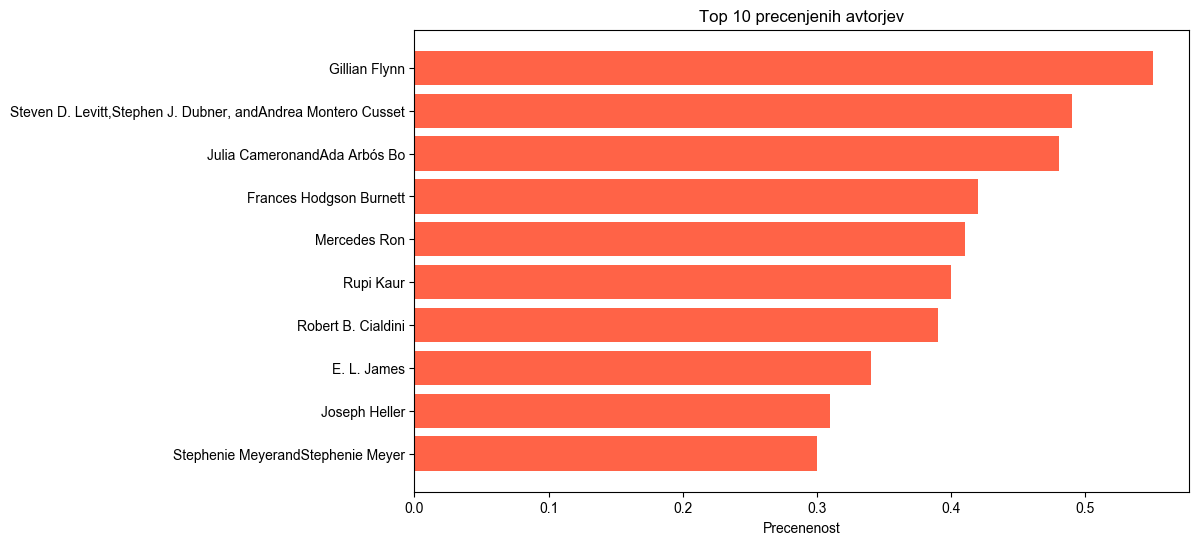

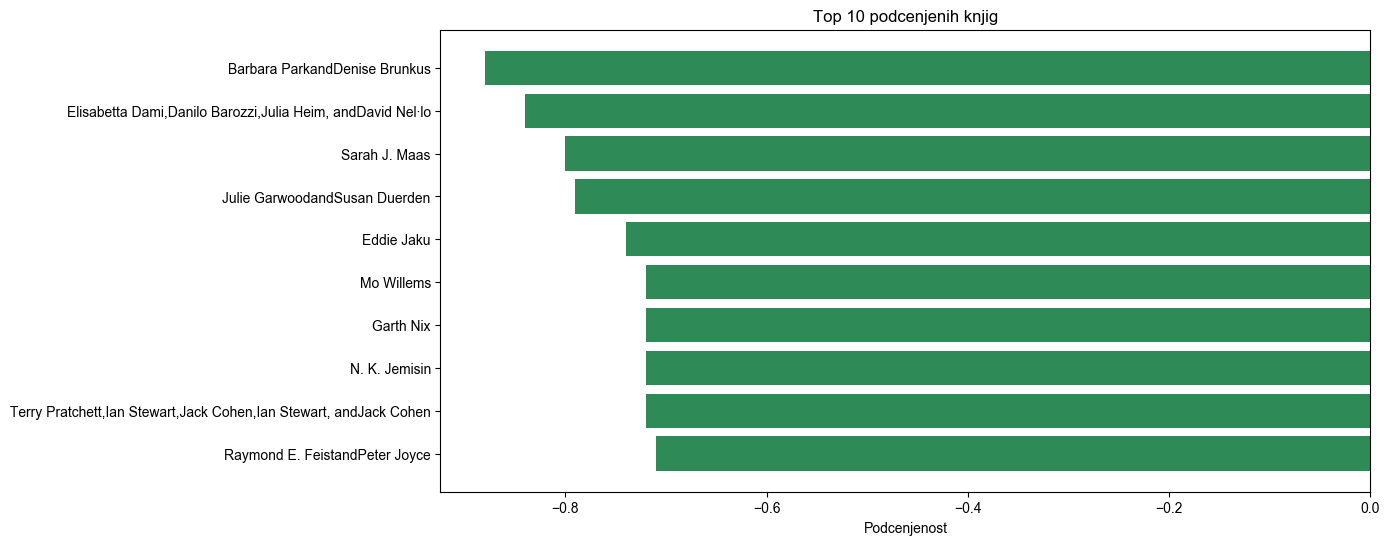

In [264]:
# Vrstični diagram najbolj precenjenih avtorjev po meri precenjenosti
plt.figure(figsize=(10,6))
plt.barh(top10_overrated_avtorjev["avtor"], top10_overrated_avtorjev["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih avtorjev")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

# Vrstični diagram najbolj podcenjenih avtorjev po meri precenjenosti
plt.figure(figsize=(12,6))
plt.barh(top10_underrated_avtorjev["avtor"], top10_underrated_avtorjev["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()